<a href="https://colab.research.google.com/github/irhamnaufal8/age-prediction-cnn/blob/main/Final_Project_Computer_Vision_1301200425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Project

## Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import urllib
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [ ]:
dataset_url = "https://github.com/irhamnaufal8/age-prediction-cnn/archive/refs/heads/main.zip"

zip_path = "/content/dataset.zip"

urllib.request.urlretrieve(dataset_url, zip_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

os.listdir("/content/age-prediction-cnn-main/UTKFace")

['1_0_2_20161219194800523.jpg.chip.jpg',
 '25_1_2_20170116175319780.jpg.chip.jpg',
 '27_1_2_20170116163552814.jpg.chip.jpg',
 '37_1_2_20170116184911351.jpg.chip.jpg',
 '29_1_0_20170104165932577.jpg.chip.jpg',
 '30_1_2_20170105162719051.jpg.chip.jpg',
 '75_0_0_20170111210208339.jpg.chip.jpg',
 '26_1_3_20170119193146682.jpg.chip.jpg',
 '26_1_1_20170116164358291.jpg.chip.jpg',
 '8_1_0_20170109204817102.jpg.chip.jpg',
 '32_0_1_20170113135924858.jpg.chip.jpg',
 '31_1_1_20170116024050198.jpg.chip.jpg',
 '1_1_3_20161220220536274.jpg.chip.jpg',
 '26_1_3_20170117153635595.jpg.chip.jpg',
 '41_0_4_20170104205137196.jpg.chip.jpg',
 '44_0_0_20170117003404757.jpg.chip.jpg',
 '67_0_0_20170120225129440.jpg.chip.jpg',
 '36_1_1_20170117171355933.jpg.chip.jpg',
 '23_1_3_20170119164040174.jpg.chip.jpg',
 '31_1_1_20170116233436288.jpg.chip.jpg',
 '26_1_2_20170116184246209.jpg.chip.jpg',
 '50_0_3_20170119195746908.jpg.chip.jpg',
 '37_1_0_20170117140054979.jpg.chip.jpg',
 '8_0_2_20170103175549207.jpg.chip.jp

In [ ]:
train_path_local = "/content/age-prediction-cnn-main/UTKFace"

In [ ]:
file_names = []
age_labels = []

for root, dirs, files in os.walk(train_path_local):
    for file in files:
        age = int(file.split('_')[0])

        file_names.append(os.path.join(root, file))
        age_labels.append(age)

df = pd.DataFrame({
    'filename': file_names,
    'age': age_labels
})

df.head()

,filename,age
0,/content/age-prediction-cnn-main/UTKFace/1_0_2...,1
1,/content/age-prediction-cnn-main/UTKFace/25_1_...,25
2,/content/age-prediction-cnn-main/UTKFace/27_1_...,27
3,/content/age-prediction-cnn-main/UTKFace/37_1_...,37
4,/content/age-prediction-cnn-main/UTKFace/29_1_...,29


# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Training set:", len(train_df))
print("Validation set:", len(val_df))
print("Test set:", len(test_df))

Training set: 14224
Validation set: 4742
Test set: 4742


# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='filename',
    y_col='age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col='filename',
    y_col='age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='validation'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col='filename',
    y_col='age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    shuffle=False
)

Found 11380 validated image filenames.
Found 948 validated image filenames.
Found 4742 validated image filenames.


# Model with MobileNetV2

## Import Library

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

## Train Model

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
356/356 [==============================] - 209s 523ms/step - loss: 8.8505 - mae: 8.8505 - val_loss: 63.3747 - val_mae: 63.3747
Epoch 2/10
356/356 [==============================] - 171s 480ms/step - loss: 6.8781 - mae: 6.8781 - val_loss: 55.3839 - val_mae: 55.3839
Epoch 3/10
356/356 [==============================] - 172s 482ms/step - loss: 6.5318 - mae: 6.5318 - val_loss: 31.4040 - val_mae: 31.4040
Epoch 4/10
356/356 [==============================] - 168s 472ms/step - loss: 6.1343 - mae: 6.1343 - val_loss: 15.6271 - val_mae: 15.6271
Epoch 5/10
356/356 [==============================] - 164s 461ms/step - loss: 5.9783 - mae: 5.9783 - val_loss: 12.7208 - val_mae: 12.7208
Epoch 6/10
356/356 [==============================] - 163s 459ms/step - loss: 5.8421 - mae: 5.8421 - val_loss: 9.0220 - val_mae: 9.0220
Epoch 7/10
356/356 [==============================] - 165s 464ms/step - loss: 5.6382 - mae: 5.6382 - val_loss: 11.8924 - val_mae: 11.8924
Epoch 8/10
356/356 [================

## Evaluation

In [ ]:
test_loss, test_mae = model.evaluate(test_generator)
print(f'MAE on Test Set: {test_mae}')

149/149 [==============================] - 58s 392ms/step - loss: 8.4384 - mae: 8.4384
MAE on Test Set: 8.438352584838867


# Model with XCeption

## Import Library

In [ ]:
from tensorflow.keras.applications import Xception

## Train Model

In [ ]:
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_xception = Sequential([
    base_model_xception,
    GlobalAveragePooling2D(),
    Dense(1, activation='linear')
])

model_xception.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

history_xception = model_xception.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

83683744/83683744 [==============================] - 3s 0us/step
Epoch 1/10
356/356 [==============================] - 337s 685ms/step - loss: 10.1352 - mae: 10.1352 - val_loss: 9.1027 - val_mae: 9.1027
Epoch 2/10
356/356 [==============================] - 230s 645ms/step - loss: 6.8501 - mae: 6.8501 - val_loss: 6.6664 - val_mae: 6.6664
Epoch 3/10
356/356 [==============================] - 224s 630ms/step - loss: 6.2702 - mae: 6.2702 - val_loss: 8.3119 - val_mae: 8.3119
Epoch 4/10
356/356 [==============================] - 227s 638ms/step - loss: 6.0032 - mae: 6.0032 - val_loss: 5.7496 - val_mae: 5.7496
Epoch 5/10
356/356 [==============================] - 229s 642ms/step - loss: 5.8270 - mae: 5.8270 - val_loss: 5.7024 - val_mae: 5.7024
Epoch 6/10
356/356 [==============================] - 225s 630ms/step - loss: 5.5308 - mae: 5.5308 - val_loss: 11.5229 - val_mae: 11.5229
Epoch 7/10
356/356 [==============================] - 218s 612ms/step - loss: 5.4639 - mae: 5.4639 - val_loss: 5.92

## Evaluation

In [ ]:
test_loss_xception, test_mae_xception = model_xception.evaluate(test_generator)
print(f'MAE on Test Set (Xception): {test_mae_xception}')

149/149 [==============================] - 64s 430ms/step - loss: 5.7360 - mae: 5.7360
MAE on Test Set (Xception): 5.7360382080078125


# Comparison

## MAE

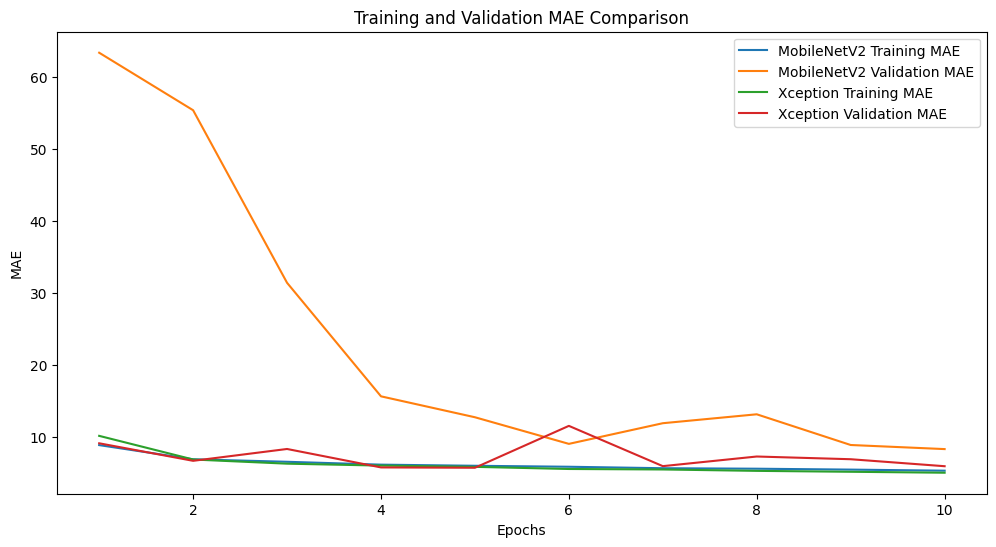

MAE on Test Set (MobileNetV2): 8.438352584838867
MAE on Test Set (Xception): 5.7360382080078125


In [ ]:
plt.figure(figsize=(12, 6))

epochs = np.arange(1, 11)

plt.plot(epochs, history.history['mae'], label='MobileNetV2 Training MAE')
plt.plot(epochs, history.history['val_mae'], label='MobileNetV2 Validation MAE')

plt.plot(epochs, history_xception.history['mae'], label='Xception Training MAE')
plt.plot(epochs, history_xception.history['val_mae'], label='Xception Validation MAE')

plt.title('Training and Validation MAE Comparison')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

print(f'MAE on Test Set (MobileNetV2): {test_mae}')
print(f'MAE on Test Set (Xception): {test_mae_xception}')